In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# <span style="color:red;"><center>CHAPITRE 1 - Structures de données (suite)</center></span>

## V. Dictionnaire

### V.1. Définition et propriétés

Un dictionnaire est une structure de données **non ordonnée** dans laquelle chaque donnée est associée à une clé unique non mutable (un entier, une chaine de caractères, un tuple, ...). 


On applique une fonction de hachage sur la clé pour obtenir l'indice du couple clé,valeur dans une table. Ce système évite de balayer l'ensemble de la table pour trouver l'élément. Si deux clés donnent la même valeur par la fonction de hachage, il est possible de chercher dans les cases suivantes, ou d'associer une liste chaînée à l'indice obtenu.

Le principe est décrit dans la vidéo suivante:

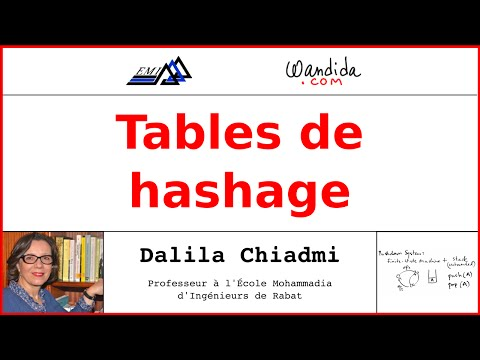

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("CkLctGYWFPA",width="850px", height="470px")


### Exercice 1:
1. implémenter la fonction **hachage** décrite dans la vidéo utilisant le code ascii de chaque caractère et la position de la lettre dans la clé. Nous utiliserons uniquement des clés sous forme de chaines de caractères. On accède au code ascii d'un caractère avec **ord(caractère)**.


In [6]:
# Question 1


la fonction **hash** de python fournit directement une implémentation d'une fonction de hachage.

2. Implémenter une structure de dictionnaire sous forme d'une **classe Dico**. Vous utiliserez des listes chainées (class Liste proposée ci-dessous) en cas de collision sur les clés, une table de 1000 cases créée lors de la construction de l'objet pour stocker ces listes chainées, et la fonction de hachage précédente comme méthode. Il faudra que votre classe contiennt les méthodes **setVal** pour ajouter un couple clé valeur dans le dictionnaire et **getVal** pour lire une valeur lorsque l'on donne la clé.

In [63]:
cacher_code("class Liste")

In [38]:
class Chainon():
    def __init__(self, cle, val, cdr):
        self.cle = cle
        self.val = val
        self.cdr = cdr
    
    def getCdr(self):
        return self.cdr
    
    def getCle(self):
        return self.cle
    
    def getVal(self):
        return self.val
    
    def setVal(self,val):
        self.val = val
        
    def isNil(self):
        return self.cle is None and self.val is None and self.cdr is None
        
        
class Liste():
    def __init__(self,cle=None,val=None,liste=None):
        """
        creation d'une liste vide par défaut
        """
        self.tete = Chainon(cle,val,liste)
        
    def supprimer(self):
        assert not self.tete.isNil()
        cle = self.tete.getCle()
        val = self.tete.getVal()
        return cle,val,self.tete.getCdr()
    
    def getCle(self):
        assert not self.tete.isNil()
        return self.tete.getCle()
    
    def getVal(self):
        assert not self.tete.isNil()
        return self.tete.getVal()
    
    def setVal(self,val):
        assert not self.tete.isNil()
        self.tete.setVal(val)
    
    def suivant(self):
        assert not self.tete.isNil()
        return self.tete.getCdr()
    
    def estVide(self):
        return self.tete.isNil()
    
    def compte(self):
        if self.tete.isNil():
            return 0
        else:
            return 1 + self.suivant().compte()
        

In [7]:
# question 2


In [53]:
cacher_code("solution",output=True)

In [47]:
class Dico():
    def __init__(self,taille=1000):
        self.tab = [Liste() for i in range(taille)]
        self.size = taille
    
    def hachage(self,cle):
        val = 0
        for i in range(len(cle)):
            val += ord(cle[i])**(i+1)
            val = val%self.size
        return val

    def setVal(self,cle,val):
        i = self.hachage(cle)
        tmp = self.tab[i]
        while not tmp.estVide():
            if cle == tmp.getCle():
                tmp.setVal(val)
                return
            tmp = tmp.suivant()
        self.tab[i]= Liste(cle,val,self.tab[i])        
        
    def getVal(self,cle):
        i = self.hachage(cle)
        tmp = self.tab[i]
        while not tmp.estVide():
            if cle == tmp.getCle():
                return tmp.getVal()
            tmp = tmp.suivant()
        return None
    
d = Dico()
print(d.getVal("hello"))

d.setVal("hello",5)
d.getVal("hello")

d.setVal("hello",6)
d.setVal("bonjour",2)
d.getVal("bonjour")

d.getVal("hello")

None


5

2

6

3. Expliquer les différences en terme de temps nécessaire pour accéder à un élément entre un Tableau, une Liste chaînée et un dictionnaire.

***Répondre ici***

4. ***Question facultative pour approfondir:*** Les dictionnaires python contiennent aussi des méthodes permettant de lister les clés (méthode **keys**), les valeurs (methode **values**) ou les couples clé:valeur (méthode **items**). Améliorer votre **classe Dico** afin qu'elle propose ces trois méthodes 

In [58]:
# Question 4


In [54]:
cacher_code("pour approfondir",output=True)

In [51]:
class Dico():
    def __init__(self,taille=1000):
        self.tab = [Liste() for i in range(taille)]
        self.size = taille
    
    def hachage(self,cle):
        val = 0
        for i in range(len(cle)):
            val += ord(cle[i])**(i+1)
            val = val%self.size
        return val

    def setVal(self,cle,val):
        i = self.hachage(cle)
        tmp = self.tab[i]
        while not tmp.estVide():
            if cle == tmp.getCle():
                tmp.setVal(val)
                return
            tmp = tmp.suivant()
        self.tab[i]= Liste(cle,val,self.tab[i])        
        
    def getVal(self,cle):
        i = self.hachage(cle)
        tmp = self.tab[i]
        while not tmp.estVide():
            if cle == tmp.getCle():
                return tmp.getVal()
            tmp = tmp.suivant()
        return None
    
    def keys(self):
        reponse = []
        for l in self.tab:
            tmp = l
            while not tmp.estVide():
                reponse.append(tmp.getCle())
                tmp = tmp.suivant()
        return reponse
    
    def values(self):
        reponse = []
        for l in self.tab:
            tmp = l
            while not tmp.estVide():
                reponse.append(tmp.getVal())
                tmp = tmp.suivant()
        return reponse
    
    def items(self):
        reponse = []
        for l in self.tab:
            tmp = l
            while not tmp.estVide():
                reponse.append((tmp.getCle(),tmp.getVal()))
                tmp = tmp.suivant()
        return reponse
    
d = Dico()
d.setVal("hello",5)
d.setVal("hello",6)
d.setVal("bonjour",2)
d.setVal("Salut",42)

d.keys()
d.values()
d.items()

['bonjour', 'hello', 'Salut']

[2, 6, 42]

[('bonjour', 2), ('hello', 6), ('Salut', 42)]

### Exercice 2:

1. Ouvrir un fichier .ipynb et afficher son contenu. Vous pourrez utiliser la fonction **open** de python (et lire sa documentation) pour cela. Observer la structure du fchier.

In [60]:
# Question 1.


In [61]:
cacher_code("solution",output=True)

In [8]:
f = open("cours_01_2.ipynb","r")
data = f.read()
f.close()
data

'{"cells":[{"metadata":{"hide_input":true,"hide_output":true,"init_cell":true,"run_control":{"marked":false},"trusted":true},"cell_type":"code","source":"# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h\\nfrom IPython.display import Javascript\\nfrom masquer import *\\nJavascript(\\"\\"\\"\\nfunction repeter(){\\nIPython.notebook.kernel.execute(\\"a=1\\");\\n}\\n// execute a = 1 en python toutes les 8 minutes pendant 2h\\nlet timerId = setInterval(() => repeter(), 4800);\\nsetTimeout(() => { clearInterval(timerId); alert(\'fin de cession\'); }, 7200000);\\n\\n// Supprimer la taille limite pour la sortie d\'une cellule\\nIPython.OutputArea.prototype._should_scroll = function(lines) {\\n    return false;\\n};\\nIPython.notebook.kernel.execute(\\"url = \'\\" + window.location + \\"\'\\");\\n\\n// Exécuter toutes les cellule du notebook\\n    require(\\n        [\'base/js/namespace\', \'jquery\'], \\n        function(jupyter, $) {\\n            \\

Il est alors possible d'évaluer la longue chaîne de caractère obtenue comme du code python (un dictionnaire) à l'aide de la fonction **eval**.

In [9]:
data = data.replace("false","False")
data = data.replace("true","True")
dico = eval(data)

Puis de récupérer les données et les métadonnées en utilisant les bonnes clés

In [10]:
# DATA
print(dico["cells"][8]['source'])

def init():
    return

def isEmpty(queue):
    return

def enQueue(element, queue):
    pass

def first(queue):
    return

def deQueue(queue):
    return


In [11]:
# METADATA de la cellule d'indice 8
print(dico["cells"][8]['metadata'])

{'hide_input': False, 'hide_output': False, 'run_control': {'marked': False}, 'trusted': True}


In [57]:
# Clés du dictionnaire principal
dico.keys()

# Métadonnées du notebook != métadonnées de cellule
dico["metadata"]

dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])

{'celltoolbar': 'Initialization Cell',
 'kernelspec': {'name': 'python3',
  'display_name': 'Python 3',
  'language': 'python'},
 'language_info': {'name': 'python',
  'version': '3.7.8',
  'mimetype': 'text/x-python',
  'codemirror_mode': {'name': 'ipython', 'version': 3},
  'pygments_lexer': 'ipython3',
  'nbconvert_exporter': 'python',
  'file_extension': '.py'},
 'varInspector': {'cols': {'lenName': 16, 'lenType': 16, 'lenVar': 40},
  'kernels_config': {'python': {'delete_cmd_postfix': '',
    'delete_cmd_prefix': 'del ',
    'library': 'var_list.py',
    'varRefreshCmd': 'print(var_dic_list())'},
   'r': {'delete_cmd_postfix': ') ',
    'delete_cmd_prefix': 'rm(',
    'library': 'var_list.r',
    'varRefreshCmd': 'cat(var_dic_list()) '}},
  'types_to_exclude': ['module',
   'function',
   'builtin_function_or_method',
   'instance',
   '_Feature'],
  'window_display': False}}

Il est ainsi possible de construire ou de modifier un notebook python à partir d'un notebook python. 

2. Proposer une fonction qui permet de lister les indices de toutes les cellules de type "code"

In [62]:
# Question 2.


In [12]:
def init():
    instack = Stack()
    outstack = Stack()
    return (instack,outstack)

def isEmpty(queue):
    return queue[0].isEmpty() and queue[1].isEmpty()

def enQueue(element, queue):
    queue[0].push(element)
    
def first(queue):
    assert not isEmpty(queue)
    if queue[1].isEmpty():
        reverseInbox(queue)
    return queue[1].top()

def reverseInbox(queue):
    assert queue[1].isEmpty()
    while not queue[0].isEmpty():
        queue[1].push(queue[0].pop())

def deQueue(queue):
    assert not isEmpty(queue)
    if queue[1].isEmpty():
        reverseInbox(queue)
    return queue[1].pop()

# Un petit essai de fonctionnement:

q = init()
isEmpty(q)

enQueue(4,q)
enQueue(5,q)
isEmpty(q)

deQueue(q)

isEmpty(q)

deQueue(q)

isEmpty(q)

NameError: name 'Stack' is not defined

<center><a href="cours_01_3.ipynb"><= PRECEDENT</a> &emsp;&emsp;&emsp;&emsp;</center>